In [12]:
from DatasetGenerator import *
from helpers import *
from markov_algos import *
from plots import *

from time import time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing the implementation

In [3]:
def testing_metropolis(data, betas, lambda_, n_iter):
    n, coords, pop = data.N, data.x, data.v
    
    print('most crowded city:', np.argwhere(pop == np.max(pop)))
    print(f(np.argwhere(pop == np.max(pop))[0], lambda_, data))
    
    starting_state = np.ones(n)
    S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True)
    
    print('S~:', S_approx)
    print('size of S~:', len(S_approx))
    print(f(S_approx, lambda_, data))

In [17]:
data = G1()  
lambda_ = 0.5
n_iter = 20000
betas = np.linspace(0, 4, 10)
testing_metropolis(data, betas, lambda_, n_iter)

most crowded city: [[68]]
0.9851525993316583
[step 1/7] Time spent on beta = 1.000 : 2.400 sec
[step 2/7] Time spent on beta = 3.162 : 2.587 sec
[step 3/7] Time spent on beta = 10.000 : 2.962 sec
[step 4/7] Time spent on beta = 31.623 : 2.848 sec
[step 5/7] Time spent on beta = 100.000 : 2.961 sec
[step 6/7] Time spent on beta = 316.228 : 3.027 sec
[step 7/7] Time spent on beta = 1000.000 : 2.797 sec
S~: [ 0  1  2  3  4  7  8  9 11 12 13 14 15 16 18 19 20 21 22 23 24 25 27 28
 30 31 34 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50 51 53 54 55 56 58
 59 60 61 62 63 64 65 66 68 69 70 71 73 76 77 78 81 82 83 84 86 87 89 90
 91 92 93 94 96 97 98 99]
size of S~: 80
5.941690483380015


In [5]:
data = G1()  
lambda_ = 0
n_iter = 1000
betas = np.linspace(0, 4, 10)
testing_metropolis(data, betas, lambda_, n_iter)

most crowded city: [[27]]
0.9833938015556597
[step 1/7] Time spent on beta = 1.000 : 0.119 sec
[step 2/7] Time spent on beta = 3.162 : 0.202 sec
[step 3/7] Time spent on beta = 10.000 : 0.146 sec
[step 4/7] Time spent on beta = 31.623 : 0.155 sec
[step 5/7] Time spent on beta = 100.000 : 0.141 sec
[step 6/7] Time spent on beta = 316.228 : 0.172 sec
[step 7/7] Time spent on beta = 1000.000 : 0.148 sec
S~: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
size of S~: 100
47.31299584594098


## Evaluating the starting point

In [6]:
lambdas = [0.5,1]

n_best_approx = np.zeros([len(lambdas),3])
count_equivalence = np.zeros([len(lambdas),4])

n_istances = 30
for l,lambda_ in enumerate(lambdas):
    for _ in range(n_istances):
        data = G1()  
        n_iter = 20000
        betas = np.linspace(0, 4, 10)
        starting_states = [np.random.randint(low=0, high=2, size=data.N), np.zeros(data.N), np.ones(data.N)]
        maxs_f_approx = np.zeros(3)
    
        for i, starting_state in enumerate(starting_states):
            S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=False)
            maxs_f_approx[i] = f(S_approx, lambda_, data)
        max_f_approx = max(maxs_f_approx)
        count = 0
        for i, max_f_approx_i in enumerate(maxs_f_approx):
            if max_f_approx_i==max_f_approx:
                n_best_approx[l,i] += 1
                count +=1
        count_equivalence[l,count] +=1
print(n_best_approx)
print(count_equivalence)

[[0. 0. 1.]
 [0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1.]
 [0. 0. 0.]]
[[0. 1. 1. 0.]
 [0. 0. 0. 0.]]
[[1. 2. 1.]
 [0. 0. 0.]]
[[0. 2. 1. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 1.]
 [0. 0. 0.]]
[[0. 3. 1. 0.]
 [0. 0. 0. 0.]]
[[3. 3. 2.]
 [0. 0. 0.]]
[[0. 3. 1. 1.]
 [0. 0. 0. 0.]]
[[3. 4. 2.]
 [0. 0. 0.]]
[[0. 4. 1. 1.]
 [0. 0. 0. 0.]]
[[4. 4. 2.]
 [0. 0. 0.]]
[[0. 5. 1. 1.]
 [0. 0. 0. 0.]]
[[5. 5. 2.]
 [0. 0. 0.]]
[[0. 5. 2. 1.]
 [0. 0. 0. 0.]]
[[6. 6. 3.]
 [0. 0. 0.]]
[[0. 5. 2. 2.]
 [0. 0. 0. 0.]]
[[6. 6. 4.]
 [0. 0. 0.]]
[[0. 6. 2. 2.]
 [0. 0. 0. 0.]]
[[7. 6. 4.]
 [0. 0. 0.]]
[[0. 7. 2. 2.]
 [0. 0. 0. 0.]]
[[7. 7. 4.]
 [0. 0. 0.]]
[[0. 8. 2. 2.]
 [0. 0. 0. 0.]]
[[8. 7. 4.]
 [0. 0. 0.]]
[[0. 9. 2. 2.]
 [0. 0. 0. 0.]]
[[8. 7. 5.]
 [0. 0. 0.]]
[[ 0. 10.  2.  2.]
 [ 0.  0.  0.  0.]]
[[9. 8. 6.]
 [0. 0. 0.]]
[[ 0. 10.  2.  3.]
 [ 0.  0.  0.  0.]]
[[10.  9.  7.]
 [ 0.  0.  0.]]
[[ 0. 10.  2.  4.]
 [ 0.  0.  0.  0.]]
[[10.  9.  8.]
 [ 0.  0.  0.]]
[[ 0. 11.  2.  4.]
 [ 0.  0.  0.  0.]]
[[11

In [15]:
starting_states = ['random', 'zeros', 'ones']
for l, lambda_ in enumerate(lambdas):
    print('\n\nFor Lambda = {}'.format(lambda_))
    for i in range(3):
        print('Using starting_state={} we get the best approx max of f {:.1%} of times'.format(starting_states[i],n_best_approx[l,i]/n_istances))
    
    print('The best approximated solution is the same for all the 3 starting_states {:.1%} of times'.format(count_equivalence[l,3]/n_istances) )
    print('The best approximated solution is the same only for 2 starting_states {:.1%} of times'.format(count_equivalence[l,2]/n_istances) )
    print('The best approximated solution is the unique among the three starting_states {:.1%} of times'.format(count_equivalence[l,1]/n_istances) ) 



For Lambda = 0.5
Using starting_state=random we get the best approx max of f 53.3% of times
Using starting_state=zeros we get the best approx max of f 60.0% of times
Using starting_state=ones we get the best approx max of f 53.3% of times
The best approximated solution is the same for all the 3 starting_states 26.7% of times
The best approximated solution is the same only for 2 starting_states 13.3% of times
The best approximated solution is the unique among the three starting_states 60.0% of times


For Lambda = 1
Using starting_state=random we get the best approx max of f 63.3% of times
Using starting_state=zeros we get the best approx max of f 76.7% of times
Using starting_state=ones we get the best approx max of f 70.0% of times
The best approximated solution is the same for all the 3 starting_states 46.7% of times
The best approximated solution is the same only for 2 starting_states 16.7% of times
The best approximated solution is the unique among the three starting_states 36.7%

## Question 2.a 

In [ ]:
data = G1()
n, coords, pop = data.N, data.x, data.v
lambda_ = 0.5
betas = np.linspace(0, 3, 7)

In [ ]:
simulated_annealing(betas, n_iter, lambda_, data, verbose=True, plot_size=True)

In [ ]:
simulated_annealing(betas, n_iter, lambda_, data, verbose=True, plot_obj=True)

## Question 2.b

1) Plotting E(|S*(lambda)|) for lambda in range [0.1, 10]

In [ ]:
lambdas = np.linspace(-1, 0, 5)

In [ ]:
plot_avg_size(G1, lambdas, betas, 2000, 5, verbose=True)

In [ ]:
plot_avg_obj(G1, lambdas, betas, 2000, 5, verbose=True)

C:\Users\Riccardo\Desktop\1° Semester\Markov Chain and algorithmic applications\markov-chains-COM-516\plots.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obj.show()
C:\Users\Riccardo\Desktop\1° Semester\Markov Chain and algorithmic applications\markov-chains-COM-516\plots.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_size.show()


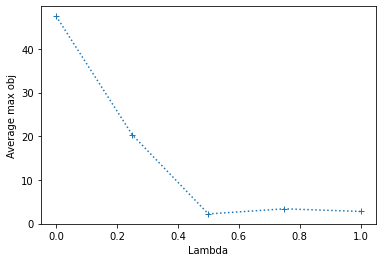

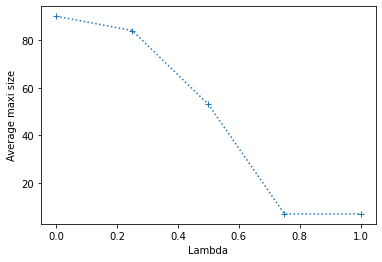

In [22]:
G = G1 
lambdas = np.linspace(0, 1, 5)
betas = np.linspace(0, 4, 10)
n_iter = 100000
nb_instances = 1
plot_avg_lambda(G, lambdas, betas, n_iter, nb_instances, verbose=False)

In [20]:
data = G() 
lambda_ = 1
n_iter = 50000
betas = np.linspace(0, 4, 10)
testing_metropolis(data, betas, lambda_, n_iter)

most crowded city: [[1]]
0.990558054963553
[step 1/7] Time spent on beta = 1.000 : 5.651 sec
[step 2/7] Time spent on beta = 4.642 : 5.548 sec
[step 3/7] Time spent on beta = 21.544 : 5.686 sec
[step 4/7] Time spent on beta = 100.000 : 5.573 sec
[step 5/7] Time spent on beta = 464.159 : 5.626 sec
[step 6/7] Time spent on beta = 2154.435 : 5.631 sec
[step 7/7] Time spent on beta = 10000.000 : 5.629 sec
S~: [ 1 18 24 25 29 30 38 42 46 48 50 64 72 77 94]
size of S~: 15
3.448133349680065


## Same questions for model G2

In [ ]:
data = G2()
n, coords, pop = data.N, data.x, data.v
lambda_ = 100
betas = np.linspace(0, 4, 10)

In [ ]:
simulated_annealing(betas, n_iter, lambda_, data, verbose=True, plot_size=True)

In [ ]:
lambdas = np.linspace(0, 2, 5)

plot_avg_obj(G2, lambdas, betas, 2000, 5, verbose=True)

In [ ]:
lambdas = np.linspace(0, 2, 5)
plot_avg_obj(G2, lambdas, betas, 2000, 5, verbose=True)